In [0]:
! pwd


### This program uses code comes from the Deep Learning with Python book by Francois Chollet  I have copied the code for learning purposes. The code can be found on pages 68-76. 

### The original code runs a model with 2 hidden layers. I then add an extra hidden layer to see how the additional layer impacts the validation loss and accuracy values. I will be making updates to this file as time goes on.

### Created:  July 2019
### Last updated: July 2019
### M. R. Sorell 2019

In [2]:
from keras.datasets import imdb

Using TensorFlow backend.


In [0]:
import numpy as np

In [0]:
# save np.load
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

# call load_data with allow_pickle implicitly set to true
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# restore np.load for future normal usage
np.load = np_load_old

In [0]:
train_data[0]

In [8]:
train_labels[0]

1

In [9]:
max([max(sequence) for sequence in train_data])

9999

In [0]:
def vectorize_sequences(sequences, dimension = 10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  return results

In [0]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [16]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [0]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [0]:
from keras import models
from keras import layers

In [0]:
model= models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [0]:
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [0]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

In [0]:
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [26]:
history = model.fit(partial_x_train, partial_y_train, epochs= 20, batch_size=512, validation_data=(x_val, y_val))

W0708 09:14:33.849243 140536505825152 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 189us/step - loss: 0.5048 - acc: 0.7876 - val_loss: 0.3774 - val_acc: 0.8703
Epoch 2/20
15000/15000 [==============================] - 2s 127us/step - loss: 0.2992 - acc: 0.9044 - val_loss: 0.3001 - val_acc: 0.8895
Epoch 3/20
15000/15000 [==============================] - 2s 125us/step - loss: 0.2173 - acc: 0.9284 - val_loss: 0.3080 - val_acc: 0.8718
Epoch 4/20
15000/15000 [==============================] - 2s 125us/step - loss: 0.1747 - acc: 0.9439 - val_loss: 0.2829 - val_acc: 0.8841
Epoch 5/20
15000/15000 [==============================] - 2s 126us/step - loss: 0.1421 - acc: 0.9539 - val_loss: 0.2855 - val_acc: 0.8856
Epoch 6/20
15000/15000 [==============================] - 2s 124us/step - loss: 0.1147 - acc: 0.9651 - val_loss: 0.3139 - val_acc: 0.8779
Epoch 7/20
15000/15000 [==============================] - 2s 123us/step - loss: 0.0977 - acc: 0.9709 - val_loss: 0.3130 - 

In [27]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

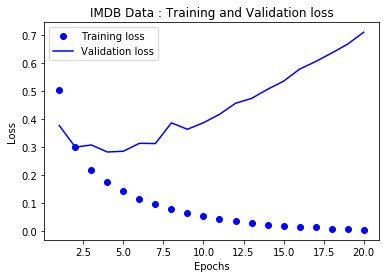

In [31]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['acc']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss_values, 'bo',label = 'Training loss' )
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('IMDB Data : Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

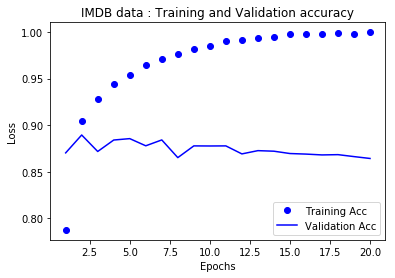

In [32]:
plt.clf()

acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label= 'Training Acc')
plt.plot(epochs, val_acc_values , 'b', label = 'Validation Acc')
plt.title('IMDB data : Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [0]:
model_2= models.Sequential()
model_2.add(layers.Dense(16, activation = 'relu', input_shape=(10000,)))
model_2.add(layers.Dense(16, activation = 'relu'))
model_2.add(layers.Dense(1, activation = 'sigmoid'))

In [0]:
model_2.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [36]:
model_2.fit(x_train,y_train, epochs= 4, batch_size=512)
results = model_2.evaluate(x_test,y_test)
results


Epoch 1/4
25000/25000 [==============================] - 3s 108us/step - loss: 0.2298 - acc: 0.9206
Epoch 2/4
25000/25000 [==============================] - 2s 95us/step - loss: 0.1859 - acc: 0.9336
Epoch 3/4
25000/25000 [==============================] - 2s 90us/step - loss: 0.1570 - acc: 0.9444
Epoch 4/4
25000/25000 [==============================] - 2s 82us/step


[0.3167300694131851, 0.87888]

In [37]:
model_2.predict(x_test)

array([[0.17873666],
       [0.9999763 ],
       [0.41021216],
       ...,
       [0.08709684],
       [0.04158837],
       [0.6692719 ]], dtype=float32)

// This runs the same model but with 3 hidden layers 

In [0]:
model_3= models.Sequential()
model_3.add(layers.Dense(16, activation = 'relu', input_shape=(10000,)))
model_3.add(layers.Dense(16, activation = 'relu'))
model_3.add(layers.Dense(16, activation = 'relu'))
model_3.add(layers.Dense(1, activation = 'sigmoid'))

In [0]:
model_3.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [40]:
history_3 = model_3.fit(partial_x_train, partial_y_train, epochs= 20, batch_size=512, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 160us/step - loss: 0.5167 - acc: 0.7741 - val_loss: 0.3838 - val_acc: 0.8667
Epoch 2/20
15000/15000 [==============================] - 2s 131us/step - loss: 0.2985 - acc: 0.9005 - val_loss: 0.2971 - val_acc: 0.8854
Epoch 3/20
15000/15000 [==============================] - 2s 127us/step - loss: 0.2142 - acc: 0.9263 - val_loss: 0.2789 - val_acc: 0.8883
Epoch 4/20
15000/15000 [==============================] - 2s 126us/step - loss: 0.1622 - acc: 0.9476 - val_loss: 0.3046 - val_acc: 0.8781
Epoch 5/20
15000/15000 [==============================] - 2s 126us/step - loss: 0.1251 - acc: 0.9606 - val_loss: 0.2943 - val_acc: 0.8865
Epoch 6/20
15000/15000 [==============================] - 2s 126us/step - loss: 0.1007 - acc: 0.9679 - val_loss: 0.3724 - val_acc: 0.8649
Epoch 7/20
15000/15000 [==============================] - 2s 128us/step - loss: 0.0813 - acc: 0.9763 - val_loss: 0.3376 - 

In [42]:
history_3_dict = history_3.history
history_3_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

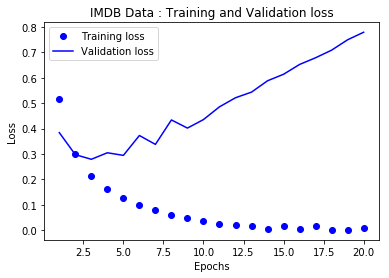

In [43]:
plt.clf()

loss_values3 = history_3_dict['loss']
val_loss_values3 = history_3_dict['val_loss']
acc3 = history_3_dict['acc']

epochs3 = range(1, len(acc3) + 1)

plt.plot(epochs3, loss_values3, 'bo',label = 'Training loss' )
plt.plot(epochs3, val_loss_values3, 'b', label = 'Validation loss')
plt.title('IMDB Data : Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

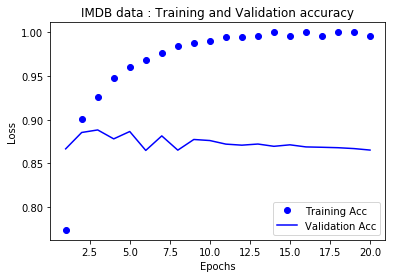

In [44]:
plt.clf()

acc_values3 = history_3_dict['acc']
val_acc_values3 = history_3_dict['val_acc']

plt.plot(epochs3, acc_values3, 'bo', label= 'Training Acc')
plt.plot(epochs3, val_acc_values3 , 'b', label = 'Validation Acc')
plt.title('IMDB data : Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

// Shows that with 3 hidden layers we should only use 3 Epochs